Saving brca1_seq.fasta to brca1_seq (1).fasta
=== Sequence Info ===
NM_007294.4 - Length: 7088 - GC%: 41.77

=== Pairwise Alignments ===

=== Pairwise Sequence Identity (%) ===

=== Phylogenetic Tree ===


/usr/local/lib/python3.12/dist-packages/Bio/Phylo/_utils.py:597: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes.set_xlim(-0.05 * xmax, 1.25 * xmax)


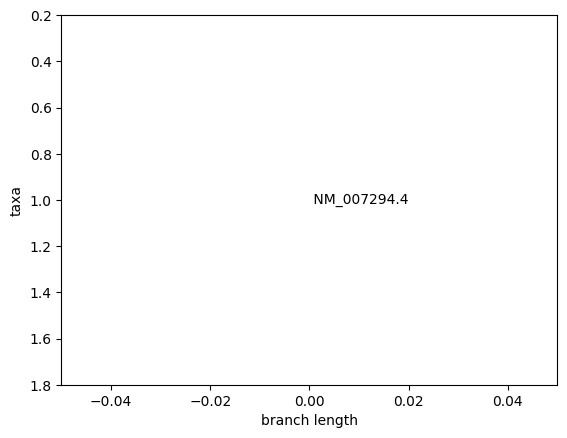

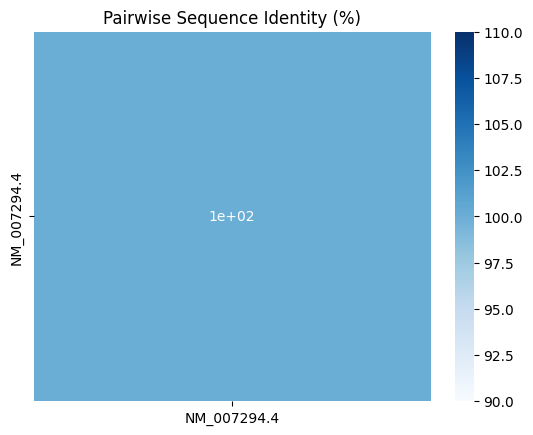

In [5]:
# ================================
# BRCA1 Comparative Analysis Project
# ================================

# Step 0: Install Biopython if not installed
!pip install biopython seaborn matplotlib

# Step 1: Upload FASTA file
from google.colab import files
uploaded = files.upload()  # Upload your brca1_seq.fasta file

# Step 2: Load sequences
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction

# Replace 'brca1_seq.fasta' with your uploaded filename if different
fasta_file = list(uploaded.keys())[0]
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Print sequence ID, length, GC content
print("=== Sequence Info ===")
for seq in sequences:
    gc_content = gc_fraction(seq.seq) * 100
    print(f"{seq.id} - Length: {len(seq.seq)} - GC%: {gc_content:.2f}")

# Step 3: Pairwise Alignment using PairwiseAligner
from Bio.Align import PairwiseAligner

aligner = PairwiseAligner()
aligner.mode = 'global'

print("\n=== Pairwise Alignments ===")
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        alignment = aligner.align(sequences[i].seq, sequences[j].seq)[0]
        print(f"\nAlignment: {sequences[i].id} vs {sequences[j].id}\n")
        print(alignment)

# Step 4: Sequence Identity Function
def sequence_identity(seq1, seq2):
    matches = sum(a==b for a,b in zip(seq1, seq2))
    return matches / min(len(seq1), len(seq2)) * 100

print("\n=== Pairwise Sequence Identity (%) ===")
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        identity = sequence_identity(sequences[i].seq, sequences[j].seq)
        print(f"{sequences[i].id} vs {sequences[j].id}: {identity:.2f}%")

# Step 5: Phylogenetic Tree
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

alignment = MultipleSeqAlignment(sequences)
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

print("\n=== Phylogenetic Tree ===")
Phylo.draw(tree)

# Step 6: Heatmap of Pairwise Identity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ids = [seq.id for seq in sequences]
n = len(sequences)
matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        matrix[i,j] = sequence_identity(sequences[i].seq, sequences[j].seq)

sns.heatmap(matrix, annot=True, xticklabels=ids, yticklabels=ids, cmap="Blues")
plt.title("Pairwise Sequence Identity (%)")
plt.show()


Saving brca1_seq.fasta to brca1_seq (4).fasta
=== Sequence Info ===
NM_007294.4 - Length: 7088 - GC%: 41.77

=== Pairwise Alignments ===

=== Pairwise Sequence Identity (%) ===


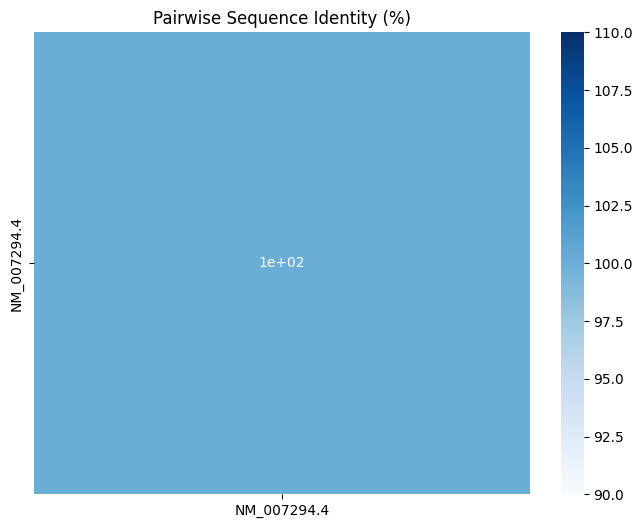

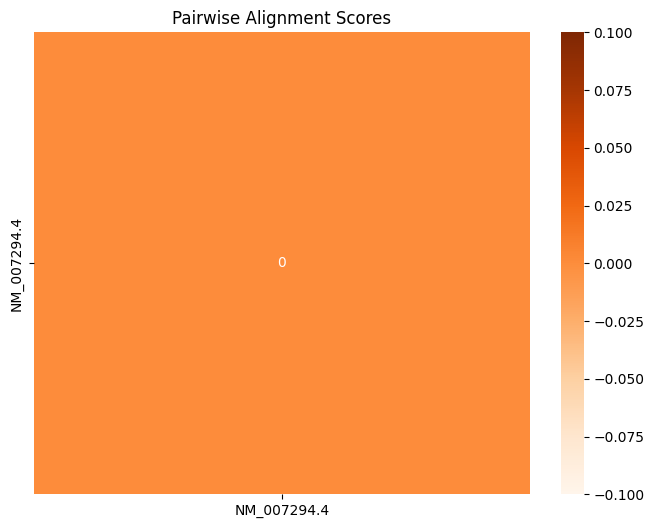

/tmp/ipython-input-539164200.py:82: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




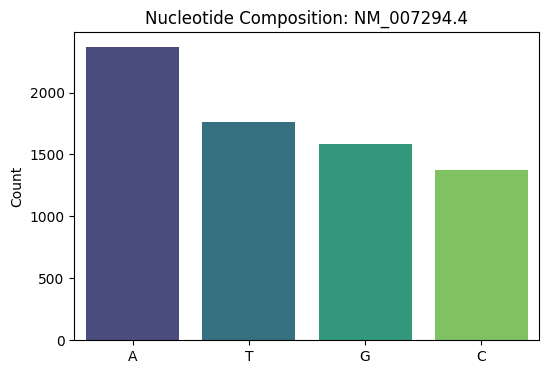

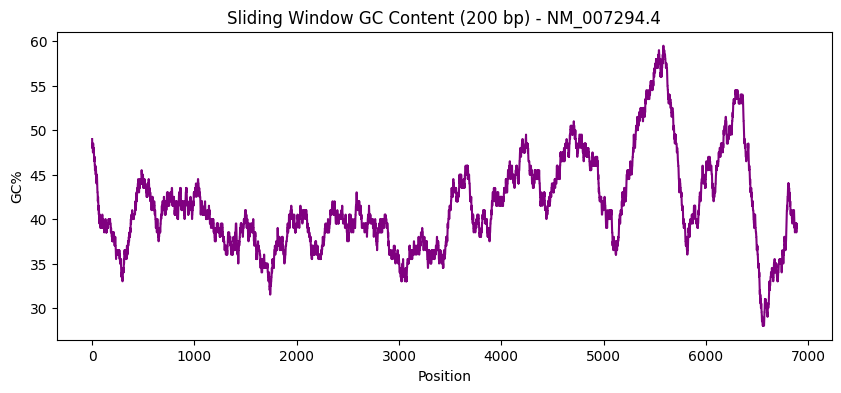


=== Phylogenetic Tree ===


/usr/local/lib/python3.12/dist-packages/Bio/Phylo/_utils.py:597: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



<Figure size 1000x600 with 0 Axes>

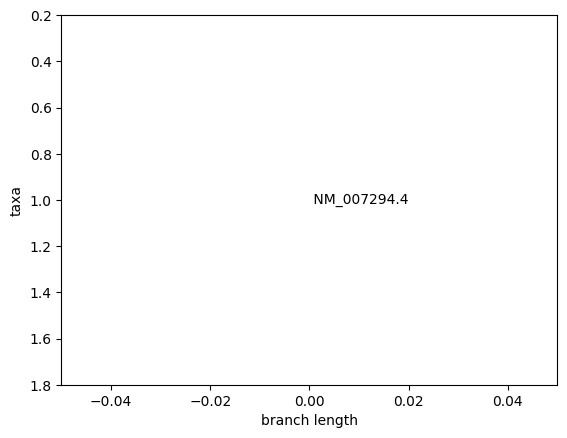

In [8]:
# ================================
# BRCA1 Comparative Analysis Project (Enhanced Visuals)
# ================================

# Step 0: Install dependencies (if not installed)
!pip install biopython seaborn matplotlib plotly

# Step 1: Upload FASTA file
from google.colab import files
uploaded = files.upload()  # Upload your brca1_seq.fasta file

# Step 2: Load sequences
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
fasta_file = list(uploaded.keys())[0]
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Step 2a: Sequence Info
print("=== Sequence Info ===")
for seq in sequences:
    gc_content = gc_fraction(seq.seq) * 100
    print(f"{seq.id} - Length: {len(seq.seq)} - GC%: {gc_content:.2f}")

# Step 3: Pairwise Alignment using PairwiseAligner
from Bio.Align import PairwiseAligner
aligner = PairwiseAligner()
aligner.mode = 'global'

# Store alignment scores
alignment_scores = {}
print("\n=== Pairwise Alignments ===")
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        alignment = aligner.align(sequences[i].seq, sequences[j].seq)[0]
        print(f"\nAlignment: {sequences[i].id} vs {sequences[j].id}\n")
        print(alignment)
        alignment_scores[(i,j)] = alignment.score

# Step 4: Sequence Identity Function
def sequence_identity(seq1, seq2):
    matches = sum(a==b for a,b in zip(seq1, seq2))
    return matches / min(len(seq1), len(seq2)) * 100

# Step 4a: Pairwise Sequence Identity
import numpy as np
n = len(sequences)
identity_matrix = np.zeros((n,n))
print("\n=== Pairwise Sequence Identity (%) ===")
for i in range(n):
    for j in range(n):
        identity = sequence_identity(sequences[i].seq, sequences[j].seq)
        identity_matrix[i,j] = identity
        if i<j:
            print(f"{sequences[i].id} vs {sequences[j].id}: {identity:.2f}%")

# Step 5: Heatmap of Pairwise Identity
import seaborn as sns
import matplotlib.pyplot as plt

ids = [seq.id for seq in sequences]
plt.figure(figsize=(8,6))
sns.heatmap(identity_matrix, annot=True, xticklabels=ids, yticklabels=ids, cmap="Blues")
plt.title("Pairwise Sequence Identity (%)")
plt.show()

# Step 6: Alignment Score Heatmap
score_matrix = np.zeros((n,n))
for (i,j), score in alignment_scores.items():
    score_matrix[i,j] = score
    score_matrix[j,i] = score  # Symmetric

plt.figure(figsize=(8,6))
sns.heatmap(score_matrix, annot=True, xticklabels=ids, yticklabels=ids, cmap="Oranges")
plt.title("Pairwise Alignment Scores")
plt.show()

# Step 7: Nucleotide Composition Barplot
for seq in sequences:
    nucleotides = ['A', 'T', 'G', 'C']
    counts = [seq.seq.count(n) for n in nucleotides]
    plt.figure(figsize=(6,4))
    sns.barplot(x=nucleotides, y=counts, palette="viridis")
    plt.title(f"Nucleotide Composition: {seq.id}")
    plt.ylabel("Count")
    plt.show()

# Step 8: Sliding Window GC Content Plot
window_size = 200
for seq in sequences:
    gc_values = [gc_fraction(seq.seq[i:i+window_size])*100 for i in range(0, len(seq.seq)-window_size+1)]
    plt.figure(figsize=(10,4))
    plt.plot(gc_values, color='purple')
    plt.title(f"Sliding Window GC Content ({window_size} bp) - {seq.id}")
    plt.xlabel("Position")
    plt.ylabel("GC%")
    plt.show()

# Step 9: Phylogenetic Tree
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

alignment = MultipleSeqAlignment(sequences)
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

print("\n=== Phylogenetic Tree ===")
plt.figure(figsize=(10,6))
Phylo.draw(tree, do_show=True)
